In [67]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # To split data into training and testing
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # To evaluate the model

In [68]:
#Reading the dataset
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [69]:
df.keys()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [70]:
# Check for missing values
print(df.isnull().sum().sort_values(ascending=False))  # Display missing values count

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [71]:
# Check for duplicate values
print(df.duplicated().sum())  # Display count of duplicate rows

0


In [72]:
# Display descriptive summary of the dataset
print(df.describe())  # Show summary statistics for numerical columns

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [73]:
# Select features (independent variables) and target (dependent variable)
X = df.drop('Sales', axis=1)  # Features (drop the target column 'price')
y = df['Sales']  # Target variable

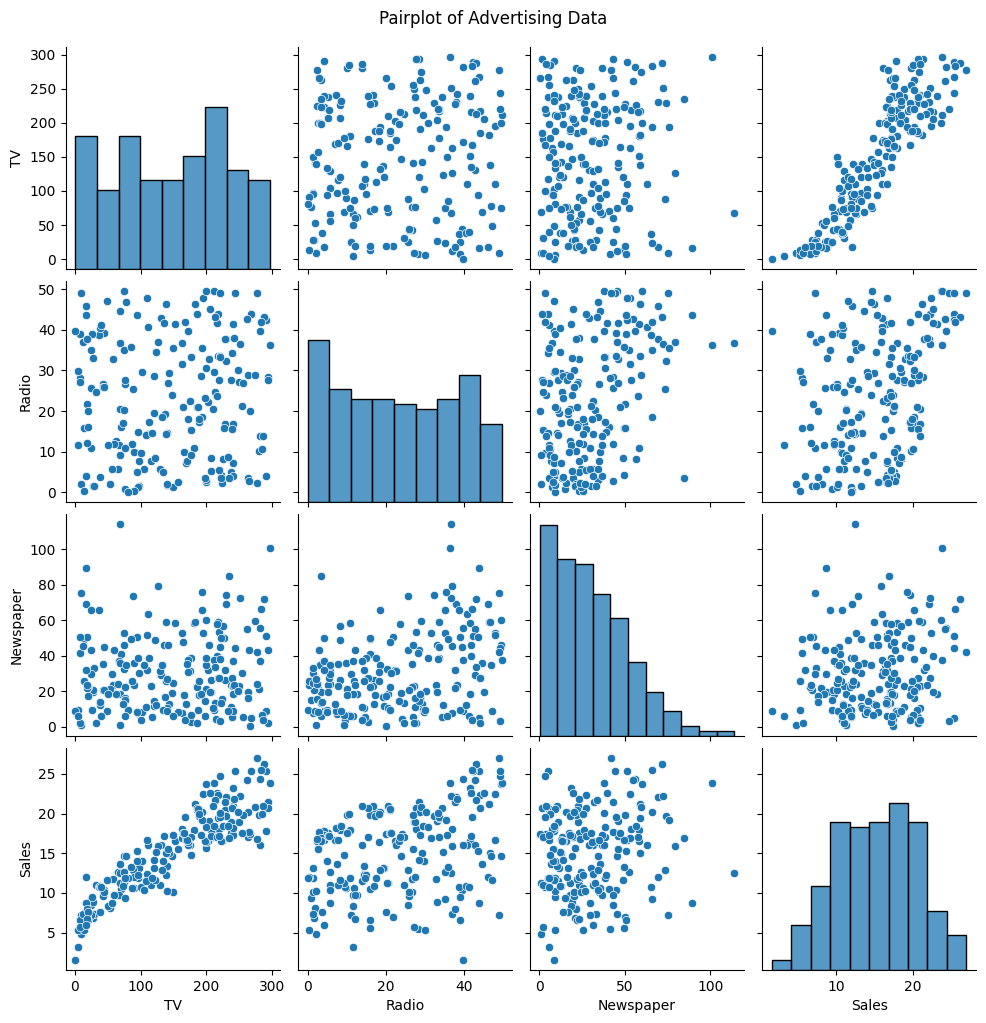

In [76]:
# Visualizations
# Plotting pairplots to visualize relationships
sns.pairplot(df)
plt.suptitle('Pairplot of Advertising Data', y=1.02)
plt.show()

In [77]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


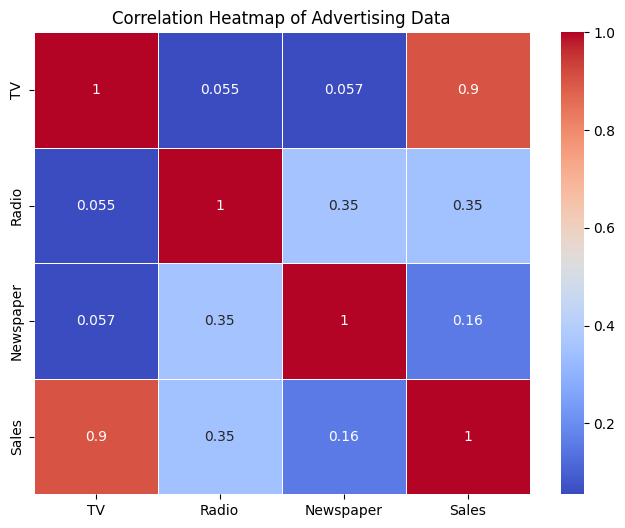

In [78]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Advertising Data')
plt.show()

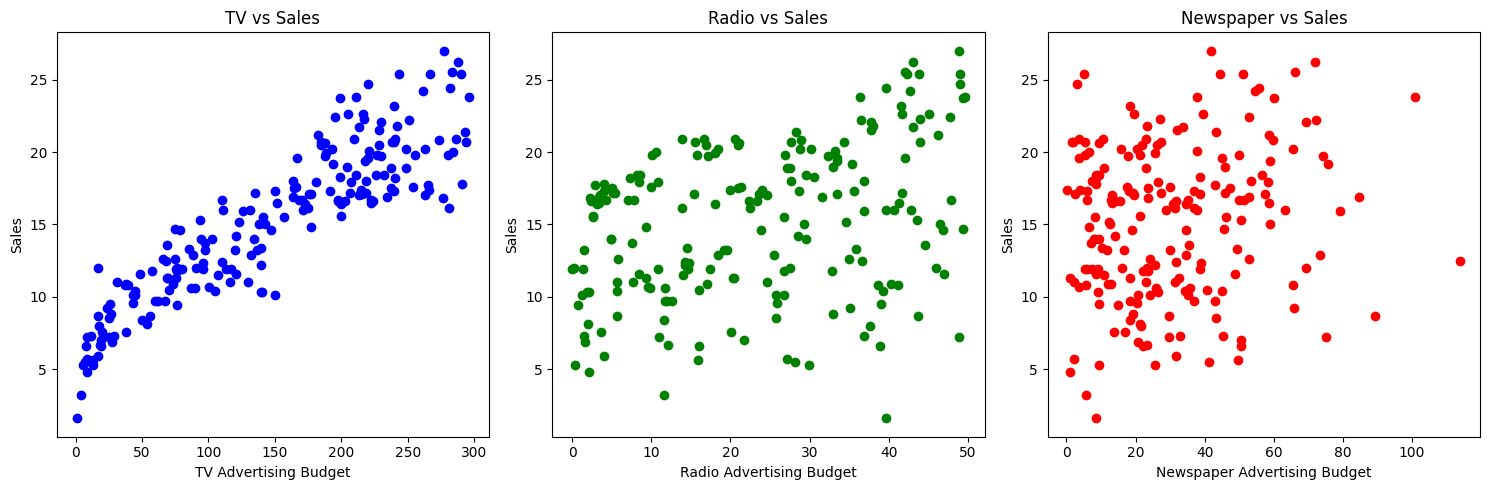

In [98]:
# Individual scatter plots
plt.figure(figsize=(15, 5))

# TV vs Sales
plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.title('TV vs Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'], color='green')
plt.title('Radio vs Sales')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'], color='red')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

In [86]:
#Chechk if there is any datatype problem
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [88]:
df.keys()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [89]:
# Select features (independent variables) and target (dependent variable)
X = df.drop('Sales', axis=1)  # Features (drop the target column 'price')
y = df['Sales']  # Target variable

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# split this X and y into Train_data and test_data
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1 )

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 3), (60, 3), (140,), (60,))

In [93]:
# intialize the model
model=LinearRegression()

# train the model
model.fit(X_train, y_train)

# test the model
y_pred=model.predict(X_test)

In [94]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  2.370659971225658
Root Mean Squared Error:  1.5396947656031237
Mean Absolute Error:  1.194741713405674
R2 Score:  0.9071151423684273


In [95]:
import pickle
pickle.dump(model, open('model_lr_ad_c0922989.pkl', 'wb')) # Save the trained model to a file
print('Model saved as model_lr_ad_c0922989.pkl') # Confirm model is saved

Model saved as model_lr_ad_c0922989.pkl
